# Exercise 01 - GC Content and Chromosome Size <img src="data/JHI_STRAP_Web.png" style="width: 150px; float: right;"> 

## Learning Outcomes

* Read and manipulate prokaryotic genome sequences using [Biopython](https://www.biopython.org).
* Extract bulk genome properties from a genome sequence
* Basic visualisation of genome properties using Python
* Use of bulk genome properties to discriminate and identify organisms

## Introduction

### Bacterial genomes

Bacterial genomes are relatively simple (especially compared to many eukaryotic genomes), and typically comprise only a single (usually circular) chromosome, and possibly a small number of plasmids.

Bacterial chromosome properties such as length and GC content vary, usually reliably, by bacterial species and genus (histogram from [http://www.sci.sdsu.edu/~smaloy/MicrobialGenetics/topics/chroms-genes-prots/genomes.html](http://www.sci.sdsu.edu/~smaloy/MicrobialGenetics/topics/chroms-genes-prots/genomes.html). 

![Histogram of approximate genome size for bacteria and archaea](http://www.sci.sdsu.edu/~smaloy/MicrobialGenetics/topics/chroms-genes-prots/genome-sizes.gif "Histogram of approximate genome size for bacteria and archaea")

### Python code

We can visualise the similarities and differences among and between genomes by plotting summary statistics using Python.

We will use the [`Biopython`](http://www.biopython.org) libraries to interact with and manipulate sequence data, and the [`Pandas`](http://pandas.pydata.org/) data analysis libraries to manipulate numerical data.

Some code is imported from the local `bs32010` module in this directory, to avoid clutter in this notebook. You can inspect this module if you are interested.

In [1]:
%matplotlib inline
from Bio import SeqIO       # Biopython libraries for working with sequence data
from bs32010 import ex01    # Functions and data specific for this exercise

## 1. Calculating nucleotide frequency and genome size using Biopython

In the lecture slides, we saw an example of loading in a genome, and calculating two values: GC content, and GC skew. These values are defined as below:

* GC content = $\frac{(G + C)}{\textrm{length}(S)}$
* GC skew = $\frac{(G - C)}{(G + C)}$

where $G$ and $C$ are the count of `G` bases and `C` bases on the forward strand of the genome sequence $S$, respectively. The code used in the lecture slide is:

![Python code to calculated GC content and skew](data/python_gc.png)

For these exercises, we will mostly work with helper functions in the Python module `bs32010`, but to revise some Python programming, we will reproduce the code in the slide below for a different genome. 

*** Example Exercise (5min): Enter the following code in the cell below. What is the organism, and what are the GC content and skew for this genome?***

```python
s = SeqIO.read("genome_data/Pectobacterium/GCA_000769535.1.fasta", "fasta")
print(s.description)
a, c, g, t = s.seq.count("A"), s.seq.count("C"), s.seq.count("G"), s.seq.count("T")
print("Genome length: %d" % len(s))
print("GC content: %.2g" % ((g + c)/len(s)))
print("GC skew: %.2g" % ((g - c)/(g + c)))
```

In [2]:
# Enter code here
s = SeqIO.read("genome_data/Pectobacterium/GCA_000769535.1.fasta", "fasta")
print(s.description)
a, c, g, t = s.seq.count("A"), s.seq.count("C"), s.seq.count("G"), s.seq.count("T")
print("Genome length: %d" % len(s))
print("GC content: %.2g" % ((g + c)/len(s)))
print("GC skew: %.2g" % ((g - c)/(g + c)))

gi|700311634|gb|CP009678.1| Pectobacterium carotovorum subsp. odoriferum strain BC S7, complete genome
Genome length: 4933575
GC content: 0.52
GC skew: -0.0023


*** Exercise 1 (5min): Adapt the above code to calculate the same quantities for the genome in the file `GCF_000011605.1.fasta`, and discover what the organism is. ***

Enter your code in the cell below.

In [3]:
# Enter code here
s = SeqIO.read("genome_data/Pectobacterium/GCF_000011605.1.fasta", "fasta")
print(s.description)
a, c, g, t = s.seq.count("A"), s.seq.count("C"), s.seq.count("G"), s.seq.count("T")
print("Genome length: %d" % len(s))
print("GC content: %.2g" % ((g + c)/len(s)))
print("GC skew: %.2g" % ((g - c)/(g + c)))

gi|49609491|emb|BX950851.1| Erwinia carotovora subsp. atroseptica SCRI1043, complete genome
Genome length: 5064019
GC content: 0.51
GC skew: 0.00026


*** Exercise 1a - stretch goal (5min): Adapt the above code to calculate the AT content and AT skew for the genome in the file `GCF_000011605.1.fasta` ***

Enter your code in the cell below.

In [4]:
# Enter code here
print("AT content: %.2g" % ((a + t)/len(s)))
print("AT skew: %.2g" % ((a - t)/(a + t)))

AT content: 0.49
AT skew: 0.0026


## 2. Calculating nucleotide frequency and genome size using helper functions

For convenience, the Python package `bs32010` is provided. For this worksheet, functions are found in the module `ex01`. We can see what functions are present using the `dir()` function.

```python
dir(ex01)
```

Run this code in the cell, below.

In [14]:
# Enter code here

You will shortly be using the `ex01.calc_size_gc()` function. You can find out useful information about any function in Python with the `help()` function.

```python
help(ex01.calc_size_gc)
```

Run this code in the cell below. Note that you need only provide the function name.

In [15]:
# Enter code here

The help text refers to to the variable `ex01.bact_files`. You can examine this by typing the variable name in the cell below.

```python
ex01.bact_files
```

This will show you the names of several bacteria that can be used with the `calc_size_gc()` function.

* 'Nostoc punctiforme'
* 'Mycoplasma pneumoniae'
* 'Mycobacterium tuberculosis'
* 'Mycoplasma genitalium'
* 'Escherichia coli'

In [17]:
# Enter code here

Test the `calc_size_gc()` function by running it on the organisms *Mycoplasma genitalium* and *Notoc punctiforme* using the code below.

```python
ex01.calc_size_gc('Mycoplasma genitalium', 'Nostoc punctiforme')
```

Run this code in the cell below.

In [8]:
# Enter code here
ex01.calc_size_gc('Mycoplasma genitalium', 'Nostoc punctiforme')

,GC,color,descrtiption,filename,length,species
0,0.316742,"(0.6388422014798609, 0.4823468031986234, 0.290...",gi|402550799|ref|NC_018495.1| Mycoplasma genit...,NC_018495.fna,579977,Mycoplasma genitalium
1,0.316710,"(0.6388422014798609, 0.4823468031986234, 0.290...",gi|402551299|ref|NC_018496.1| Mycoplasma genit...,NC_018496.fna,579504,Mycoplasma genitalium
2,0.316767,"(0.6388422014798609, 0.4823468031986234, 0.290...",gi|402551784|ref|NC_018497.1| Mycoplasma genit...,NC_018497.fna,579796,Mycoplasma genitalium
3,0.316748,"(0.6388422014798609, 0.4823468031986234, 0.290...",gi|402552294|ref|NC_018498.1| Mycoplasma genit...,NC_018498.fna,579558,Mycoplasma genitalium
4,0.414150,"(0.0, 0.2720066253738353, 0.4900832272420432)",gi|186680550|ref|NC_010628.1| Nostoc punctifor...,NC_010628.fna,8234322,Nostoc punctiforme


The function `ex01.plot_data()` will plot genome length against GC content, with coloured points for each genome sequence. Test this using the code below.

```python
gc_data = ex01.calc_size_gc('Mycoplasma genitalium', 'Nostoc punctiforme')
ex01.plot_data(gc_data)
```


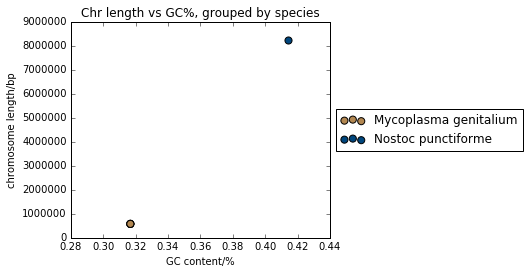

In [9]:
# Enter code here
gc_data = ex01.calc_size_gc('Mycoplasma genitalium', 'Nostoc punctiforme')
ex01.plot_data(gc_data)

You should now see a plot of chromosome length and GC content that looks something like the one shown below.

![Expected output of `ex01.plot_data`](data/length_gc_plot.png)

You should see that `M. genitalium` has much smaller chromosomes, and a lower GC content than `Nostoc punctiforme`. There is not a great deal of variation in genome size and GC content for either organism.

*** Exercise 2 (5min): Produce a scatterplot of all the example chromosomes in `bact_files`. Which organism has the largest/smallest chromosome? Which has the largest/smallest GC content? ***

* **HINT:** You can use `list(ex01.bacteria)` to obtain a list of all the bacteria names you need
    
*** Exercise 2a - stretch goal (5min): Use the `help()` function to find out how to write your plot to a file, and produce the file `"all_chromosomes.pdf"` ***

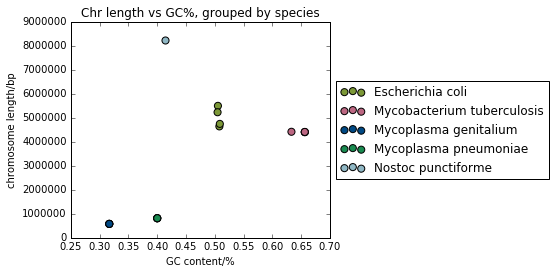

In [10]:
# Enter code here
list(ex01.bacteria)
gc_data = ex01.calc_size_gc(*ex01.bacteria)
ex01.plot_data(gc_data, filename="all_chromosomes.pdf")

## 3 Using chromosome length and GC content to identify an organism

Summary statistics such as the chromosome length and GC content can be characteristic of a bacterial species, it is possible to use them to help infer the species of bacterium from which an "unknown" chromosome sequence may originate.

We can add new data representing a chromosome of unknown origin to the data for all example chromosomes, and produce a scatterplot. The proximity of hte unknown genome to points from a named species may indicate the origin of the unknown chromosome.

The `bs32010.ex01` module provides GC content and genome size information about an unknown organism, in the variable `unknown` (a `Pandas` dataframe). We can look at it with

```python
ex01.unknown
```

Enter this code in the cell below.

In [11]:
# Enter code here
ex01.unknown

,GC,color,length,species
0,0.656209,"(1, 0.2, 0.2)",4391174,Unknown


The unknown organism has a genome length of 4.4Mbp, and GC content of around 66%. You could determine a likely identity for this organism from a scatterplot, by visual inspection. To generate the input data for the scatterplot, enter the following code in the cell below:

```python
all_data = ex01.calc_size_gc(*ex01.bacteria)
all_data = all_data.append(ex01.unknown)
```

In [12]:
# Enter code here
all_data = ex01.calc_size_gc(*ex01.bacteria)
all_data = all_data.append(ex01.unknown)

*** Exercise 3 (5min): Render a scatterplot of `all_data`, and identify the unknown organism. ***

In [13]:
# Enter code here